In [25]:
import numpy as np
import pandas as pd

from scipy import stats 

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
%matplotlib inline
import sktime

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
dff = pd.read_csv('avocado_small.tsv', sep='\t', parse_dates=['Date']).set_index('Date')

# Периодичность данных - месячная 
dff.index = dff.index.to_period("M")

# будем смотреть только на тип organic 
dff = dff[dff.Type == 'organic'] 
print(dff.shape)
dff.head()

(2105, 4)


,AveragePrice,Region,Year,Type
Date,,,,
2015-12,1.84,Albany,2015,organic
2015-11,1.88,Albany,2015,organic
2015-10,1.98,Albany,2015,organic
2015-09,1.86,Albany,2015,organic
2015-08,2.00,Albany,2015,organic


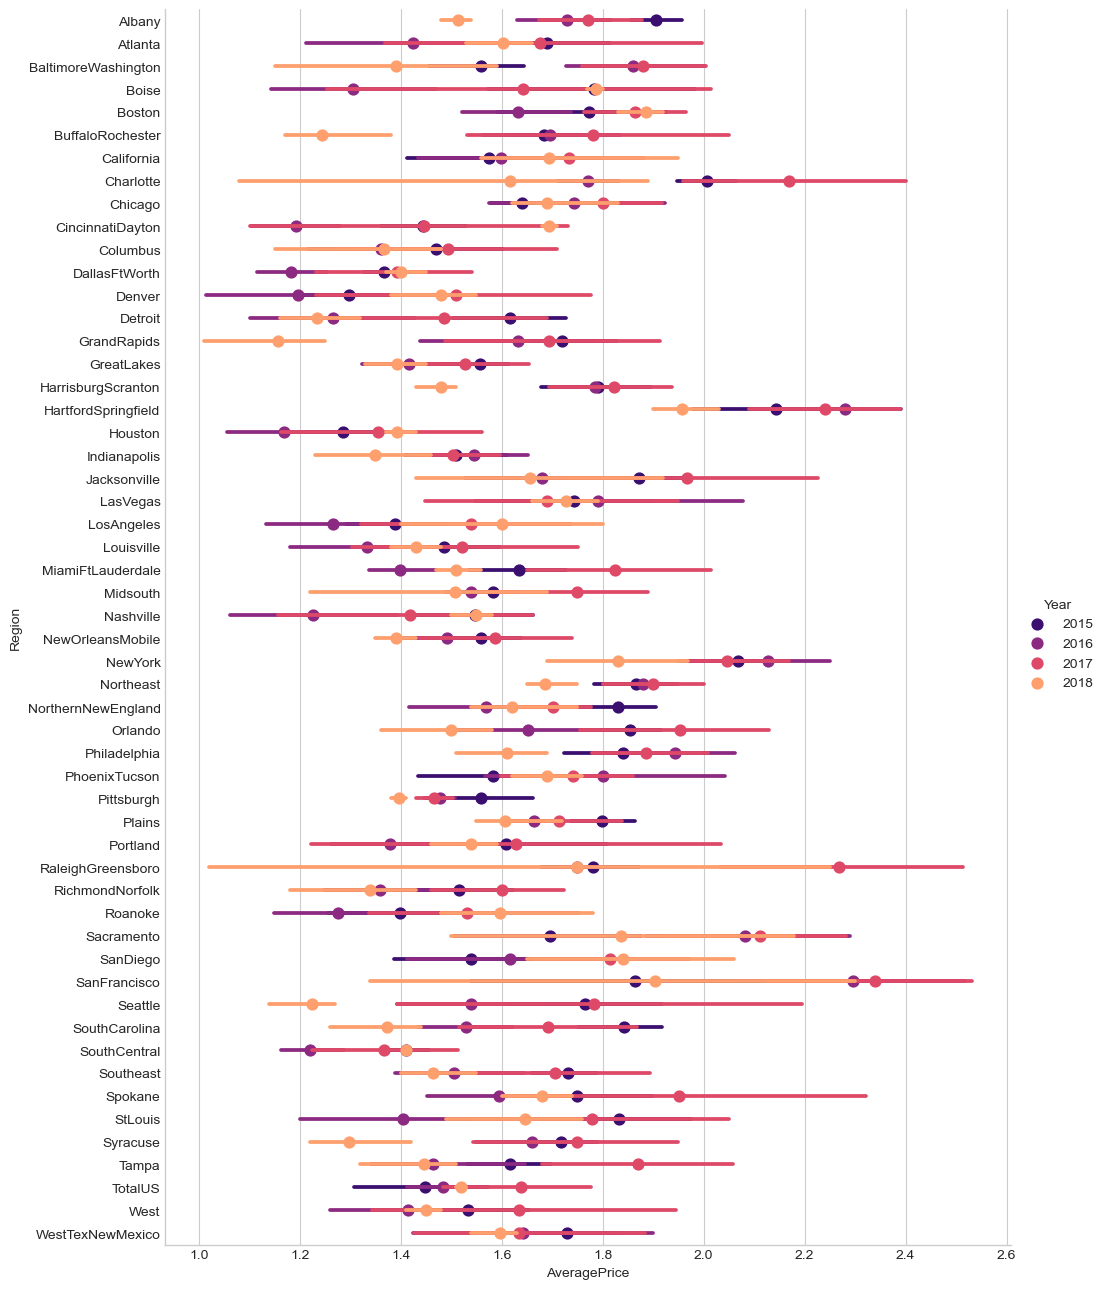

In [4]:
sns.factorplot('AveragePrice', 'Region', data=dff, hue='Year',
                size=13, aspect=0.8, palette='magma', join=False);

In [5]:
df = dff[['AveragePrice', 'Region']]
df.head()

,AveragePrice,Region
Date,,
2015-12,1.84,Albany
2015-11,1.88,Albany
2015-10,1.98,Albany
2015-09,1.86,Albany
2015-08,2.00,Albany


In [6]:
df.index.unique().size

39

In [7]:
df.Region.unique().size

54

27 12


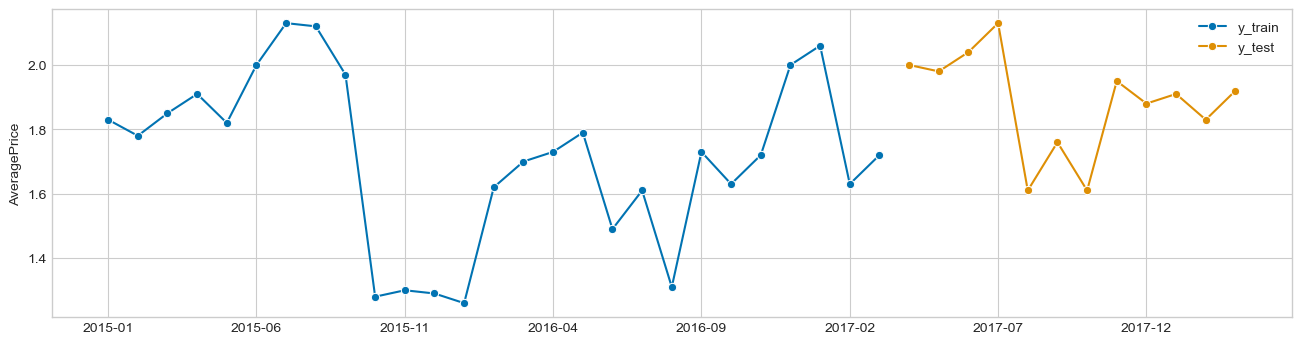

In [33]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

TEST_SIZE = 12
REGION = 'Boston'

y = df[df['Region'] == REGION].sort_index()['AveragePrice'].asfreq('m')

y_train, y_test = temporal_train_test_split(y, test_size = TEST_SIZE)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [35]:
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(y_test.index, is_relative=False)

In [37]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

11.724806201550386


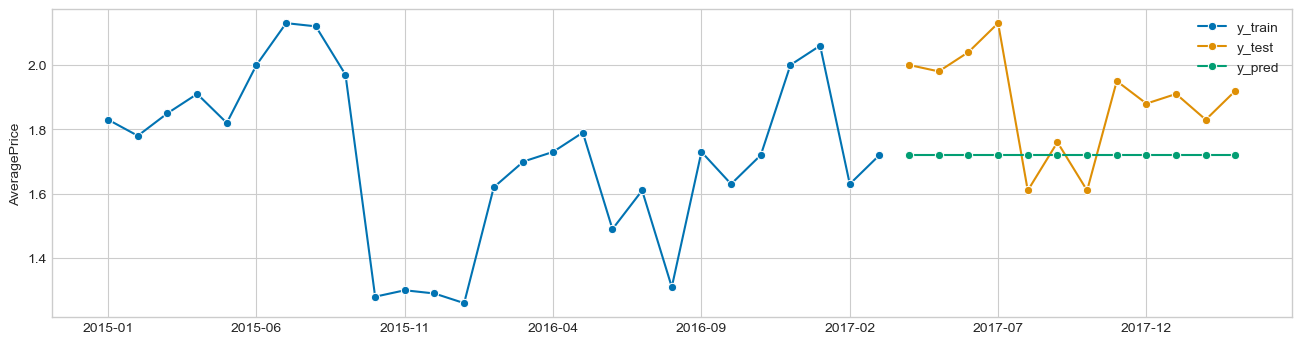

In [14]:
from sktime.forecasting.naive import NaiveForecaster

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
ans1 = 10.39037393153609

# your code here
print(mape(y_pred, y_test))

13.26115547244008

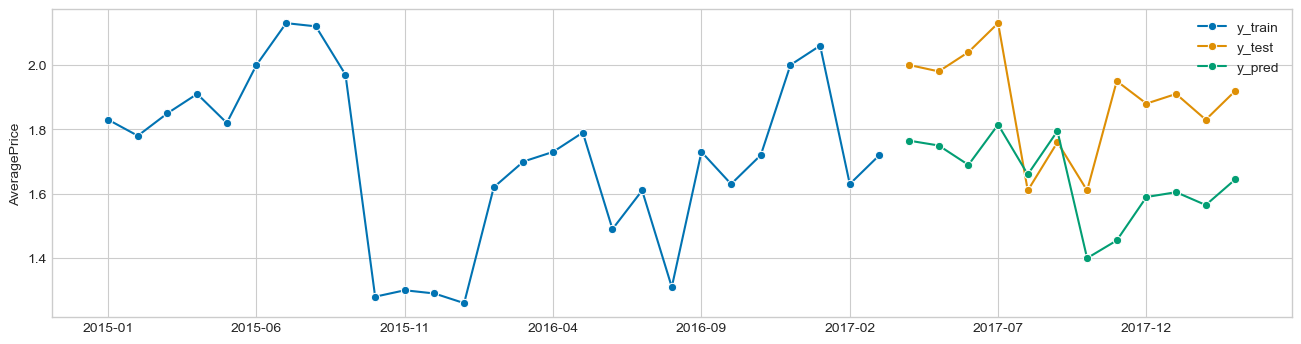

In [15]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import statsmodels.api as sm

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
forecaster = ExponentialSmoothing(trend="add", seasonal="add", sp=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
ans2 = 13

# your code here
mape(y_test, y_pred)

In [17]:
ets_aaa = sm.tsa.statespace.ExponentialSmoothing(y_train, trend=True, seasonal=12)
ets_aaa_res = ets_aaa.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95680D-01    |proj g|=  1.23156D+00

At iterate    5    f=  9.33317D-02    |proj g|=  3.57953D+00

At iterate   10    f=  1.24790D-02    |proj g|=  1.33700D-01

At iterate   15    f=  9.81068D-03    |proj g|=  6.45878D-01

At iterate   20    f= -1.81100D-02    |proj g|=  1.20086D-01

At iterate   25    f= -2.31520D-02    |proj g|=  1.92486D-01

At iterate   30    f= -4.09387D-02    |proj g|=  3.29406D-01

At iterate   35    f= -4.56051D-02    |proj g|=  3.25899D-01

At iterate   40    f= -5.81455D-02    |proj g|=  2.03300D+00

At iterate   45    f= -6.28243D-02    |proj g|=  4.78870D-01

At iterate   50    f= -6.34766D-02    |proj g|=  2.10131D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/inreleppik/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
ets_aaa_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:           AveragePrice   No. Observations:                   27
Model:                   ETS(A, A, A)   Log Likelihood                   1.714
Date:                Mon, 30 Jan 2023   AIC                             30.572
Time:                        17:18:32   BIC                             52.601
Sample:                    01-31-2015   HQIC                            37.123
                         - 03-31-2017   Scale                            0.052
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
smoothing_level          0.0001      0.181      0.001      0.999      -0.354       0.354
smoothing_trend          0.0001      0.064      0.002      0.999      -0.126       0.126
smoothing_seasonal       0.0004      0.944      0.000      1.000      -1.850       1.851
initial_level            1.7644      0.497      3.551      0.000       0.791       2.738
initial_trend           -0.0037      0.017     -0.210      0.833      -0.038       0.030
initial_seasonal        -0.0516      0.494     -0.104      0.917      -1.019       0.916
initial_seasonal.L1     -0.1944      0.491     -0.396      0.692      -1.156       0.767
initial_seasonal.L2     -0.2592      0.496     -0.523      0.601      -1.231       0.712
initial_seasonal.L3      0.1354      0.576      0.235      0.814      -0.994       1.265
initial_seasonal.L4      0.0029      0.505      0.006      0.995      -0.987       0.993
initial_seasonal.L5      0.1509      0.494      0.306      0.760      -0.817       1.119
initial_seasonal.L6      0.0253      0.492      0.051      0.959      -0.939       0.990
initial_seasonal.L7      0.0794      4.933      0.016      0.987      -9.590       9.749
initial_seasonal.L8      0.0983      0.668      0.147      0.883      -1.211       1.408
initial_seasonal.L9      0.0484      0.772      0.063      0.950      -1.465       1.562
initial_seasonal.L10    -0.0395      0.736     -0.054      0.957      -1.482       1.403
===================================================================================
Ljung-Box (L1) (Q):                  14.17   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.00   Prob(JB):                         0.78
Heteroskedasticity (H):               2.12   Skew:                            -0.14
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

13.152067816798832

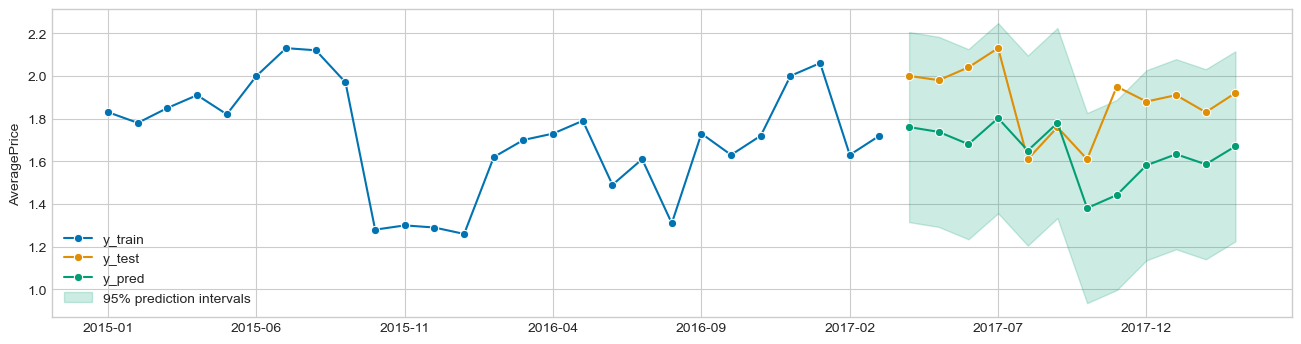

In [19]:
h=12
df_forecast = ets_aaa_res.get_forecast(h).summary_frame()
df_forecast.index = fh
df_forecast.head()
fig, ax = plot_series(y_train, y_test, df_forecast['mean'], labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    df_forecast["mean_ci_lower"],
    df_forecast["mean_ci_upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"95% prediction intervals",
)
ax.legend(loc='lower left');
mape(y_test, df_forecast['mean'])

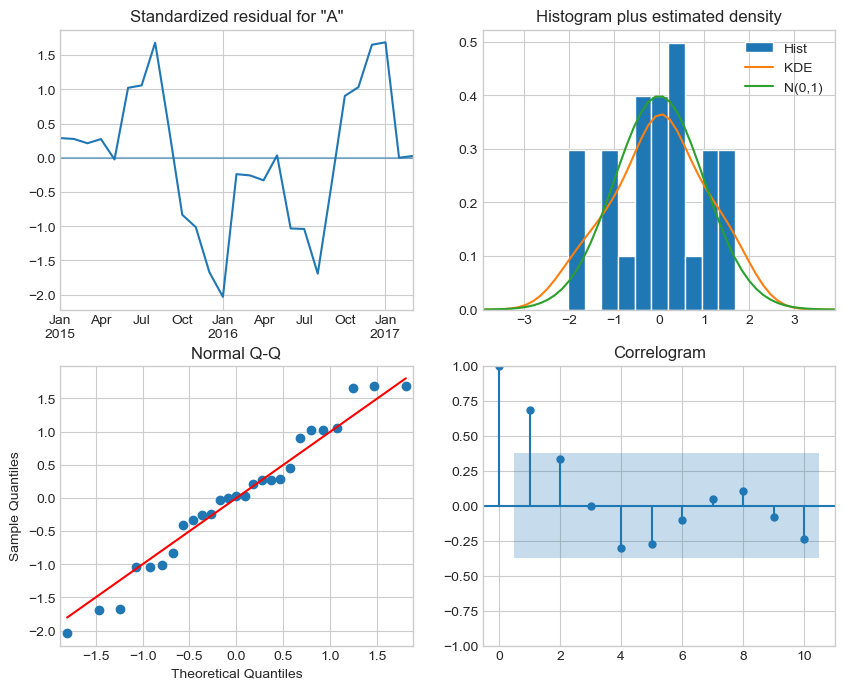

In [20]:
ets_aaa_res.plot_diagnostics(figsize=(10, 8));

8.68974358350432

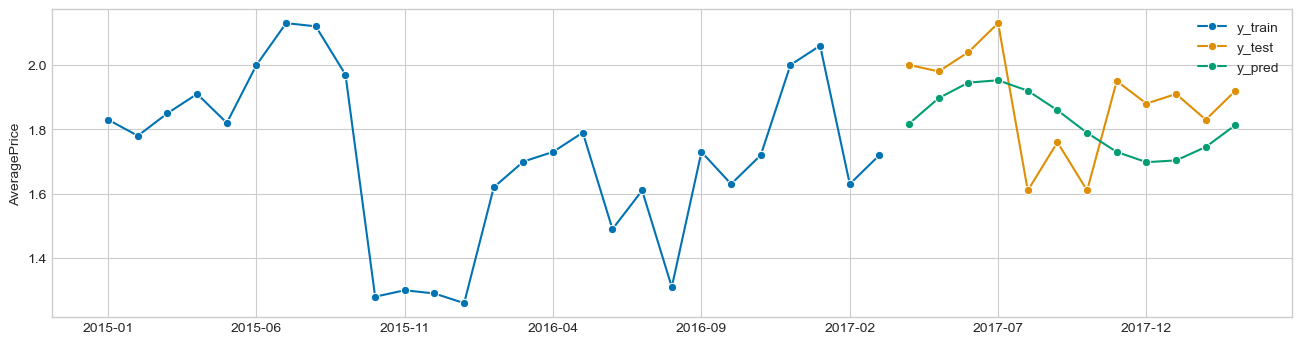

In [21]:
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(sp=12, 
                   use_trend=True, 
                   use_damped_trend=True,
                   use_arma_errors=True,
                   use_box_cox=True)
    
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
# your code here
mape(y_test, y_pred)

20.31600269689938

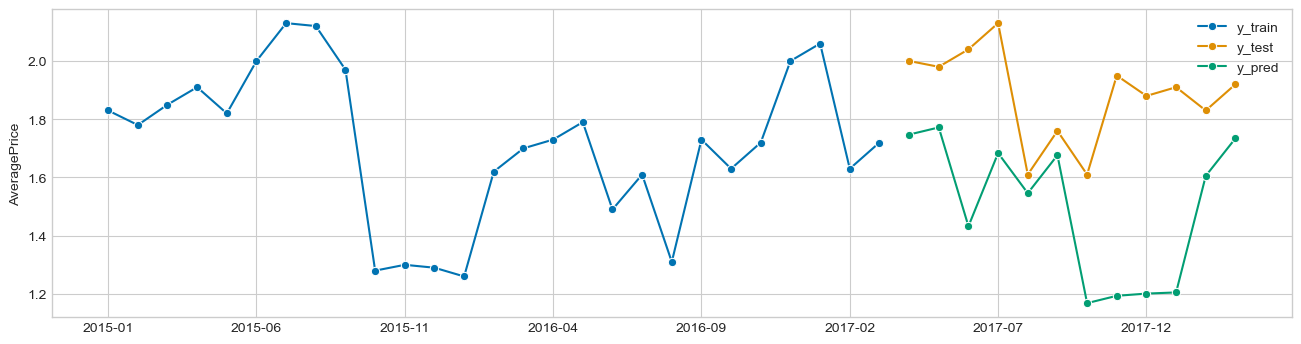

In [22]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
# your code here
mape(y_test, y_pred)

12.986312601742817

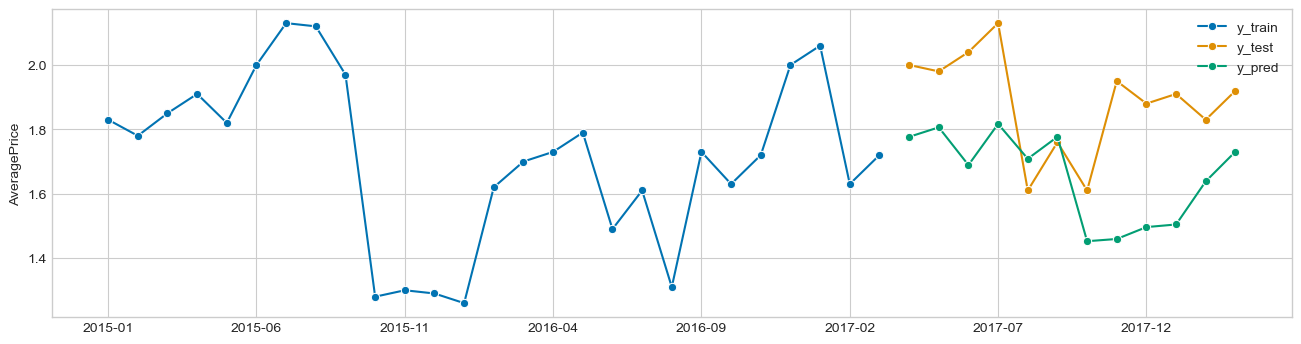

In [23]:
from sktime.forecasting.compose import EnsembleForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing


### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

forecaster = EnsembleForecaster(
    [("ets",   ExponentialSmoothing(trend="add", seasonal="add", sp=12)),
     ("TBATS", TBATS(sp=12, use_trend=True, use_damped_trend=True, use_arma_errors=True, use_box_cox=True)),
     ("Theta", ThetaForecaster(sp=12))
    ]
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
# your code here

ans5 = 12.986312601742817
mape(y_test, y_pred)

In [24]:
from sktime.forecasting.model_selection import SlidingWindowSplitter

# параметры для кросс-валидации
window_length = 27                     # y_train.size
fh = ForecastingHorizon([1, 2, 3])     # максимум на 3 месяца вперёд
fh_length = len(fh)                    # даты для тестовой выборки

cv_window = SlidingWindowSplitter(window_length=window_length, fh=fh, start_with_window=True)

n_splits = cv_window.get_n_splits(y)
print(f"Number of Folds = {n_splits}")

Number of Folds = 10


In [27]:
def mape(y_true, y_pred): 
    return np.abs((y_true - y_pred) / y_true)* 100

def cross_val_sccore(forecaster, y, cv=cv_window):
    M = [ ]

    for idx_train, idx_val in cv.split(y):
        
        y_tr = y[idx_train]
        y_val = y[idx_val]
        fh_val = y_val.index
        
        # обучение модели
        
        forecaster.fit(y_tr)
        y_pred = forecaster.predict(fh_val)# прогнозирование на период fh_val
        # your code here
        
        
        M.append(mape(y_val, y_pred).values)
        
    return np.array(M)

M = cross_val_sccore(ThetaForecaster(sp=12), y)
quality = M.mean(axis=0)
quality

array([11.0896312 , 14.67886759, 14.90843771])

In [28]:
from sktime.forecasting.ets import AutoETS

forecaster_1 = NaiveForecaster(strategy="last")
forecaster_2 = NaiveForecaster(strategy="mean", window_length=12)
forecaster_3 = NaiveForecaster(strategy="last", sp=12)

forecaster_4 = ThetaForecaster(sp=12)
forecaster_5 = AutoETS(auto=True, sp=12, n_jobs=-1, information_criterion='bic')

forecaster_6 = TBATS(sp=12, 
                   use_trend=True, 
                   use_damped_trend=True,
                   use_arma_errors=True,
                   use_box_cox=True)

fc = [forecaster_1, forecaster_2, forecaster_3,
     forecaster_4, forecaster_5, forecaster_6]

In [29]:
dff = pd.DataFrame(columns = ['Forecaster','MAPE_1', 'MAPE_2', 'MAPE_3'])
from tqdm.notebook import tqdm
j=1
for i in tqdm(np.arange(6)):
    M=0
    M = cross_val_sccore(fc[i], y)
    M = M.mean(axis=0)
    dff.loc[i] = ['forecaster_{num:}'.format(num=j), M[0], M[1], M[2]]
    j += 1
print("Best forecast for next month: " + dff[dff.MAPE_1 == dff.MAPE_1.min()].Forecaster,
     "Best forecast for next 2 months: " + dff[dff.MAPE_2 == dff.MAPE_2.min()].Forecaster,
     "Best forecast for next 3 months: " + dff[dff.MAPE_3 == dff.MAPE_3.min()].Forecaster, sep='\n')

  0%|          | 0/6 [00:00<?, ?it/s]

4    Best forecast for next month: forecaster_5
Name: Forecaster, dtype: object
5    Best forecast for next 2 months: forecaster_6
Name: Forecaster, dtype: object
1    Best forecast for next 3 months: forecaster_2
Name: Forecaster, dtype: object


In [30]:
dff

,Forecaster,MAPE_1,MAPE_2,MAPE_3
0,forecaster_1,9.504425,9.879693,14.114455
1,forecaster_2,10.056734,8.772524,7.315006
2,forecaster_3,12.208146,11.951043,12.033113
3,forecaster_4,11.089631,14.678868,14.908438
4,forecaster_5,8.780544,10.665282,12.965998
5,forecaster_6,10.352422,8.265548,8.886308


In [ ]:
dffc = pd.DataFrame(columns = ['Region', 'Forecaster','MAPE_1', 'MAPE_2', 'MAPE_3'])
for i in tqdm(df.Region.unique()):
        Y = df[df.Region == i].sort_index()['AveragePrice'].asfreq('m')
        forecaster_1 = NaiveForecaster(strategy="last")
        forecaster_2 = NaiveForecaster(strategy="mean", window_length=12)
        forecaster_3 = NaiveForecaster(strategy="last", sp=12)
        forecaster_4 = ThetaForecaster(sp=12)
        forecaster_5 = AutoETS(auto=True, sp=12, n_jobs=-1, information_criterion='bic')
        forecaster_6 = TBATS(sp=12, 
                             use_trend=True, 
                             use_damped_trend=True,
                             use_arma_errors=True,
                             use_box_cox=True)
        fc = [forecaster_1, forecaster_2, forecaster_3,
              forecaster_4, forecaster_5, forecaster_6]
        k = 1
        
        for j in tqdm(np.arange(len(fc))):
            M=0
            M = cross_val_sccore(fc[j], Y)
            M = M.mean(axis=0)
            dffc.loc[len(dffc)] = [i ,'forecaster_{num:}'.format(num=k), M[0], M[1], M[2]]
            k += 1

In [ ]:
dffc.head()

In [ ]:
dffc.groupby('Forecaster').mean()